# EMTAB7376-preprocessing
## Xiaonan Wang
## 29May2022

In [2]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.0 leidenalg==0.8.3


# Data in

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7376/'

In [3]:
adata1 = sc.read(FileDir + 'GFP_ShamVsMI_days3_7.txt', cache=True).T
adata2 = sc.read(FileDir + 'TIP_ShamVsMI_days3_7.txt', cache=True).T

... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-EMTAB7376-GFP_ShamVsMI_days3_7.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-EMTAB7376-TIP_ShamVsMI_days3_7.h5ad


In [4]:
adata1.obs_names[0:2]

Index(['AAACCTGAGACCTTTG_Sham_day3', 'AAACCTGAGCGTGTCC_Sham_day3'], dtype='object')

In [5]:
meta = pd.read_csv(FileDir + 'E-MTAB-7376.sdrf.txt', index_col=0, sep='\t')
print(meta.shape)

(22, 69)


In [6]:
# remove duplicates due to paired end sequencing R1,R2
meta = meta.drop_duplicates(subset=['Comment[ENA_SAMPLE]'])

In [7]:
meta

,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[strain],Characteristics[age],Unit[time unit],Characteristics[developmental stage],Characteristics[sex],Characteristics[organism part],Characteristics[genotype],...,Protocol REF.5,Derived Array Data File,Comment [Derived ArrayExpress FTP file],Protocol REF.6,Derived Array Data File.1,Comment [Derived ArrayExpress FTP file].1,Factor Value[time],Unit[time unit].1,Factor Value[fraction],Factor Value[injury]
Source Name,,,,,,,,,,,,,,,,,,,,,
MI_day3_GFP_001_Mouse,ERS2921927,SAMEA5137559,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,B6.129S4-Pdgfratm11(EGFP)Sor/J,...,P-MTAB-81041,GFP_ShamVsMI_days3_7.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-81041,GFP_tSNE_cluster_ID_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,3,day,GFP positive; CD31 negative,myocardial infarction
Sham_day3_GFP_000_Mouse,ERS2921928,SAMEA5137560,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,B6.129S4-Pdgfratm11(EGFP)Sor/J,...,P-MTAB-81041,GFP_ShamVsMI_days3_7.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-81041,GFP_tSNE_cluster_ID_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,3,day,GFP positive; CD31 negative,sham
MI_day7_GFP_S1,ERS2921929,SAMEA5137561,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,B6.129S4-Pdgfratm11(EGFP)Sor/J,...,P-MTAB-81041,GFP_ShamVsMI_days3_7.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-81041,GFP_tSNE_cluster_ID_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,7,day,GFP positive; CD31 negative,myocardial infarction
Sham_day7_GFP_S1,ERS2921930,SAMEA5137562,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,B6.129S4-Pdgfratm11(EGFP)Sor/J,...,P-MTAB-81041,GFP_ShamVsMI_days3_7.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-81041,GFP_tSNE_cluster_ID_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,7,day,GFP positive; CD31 negative,sham
MI_day3_TIP_S2,ERS2921931,SAMEA5137563,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,B6.129S4-Pdgfratm11(EGFP)Sor/J,...,P-MTAB-81041,TIP_ShamVsMI_days3_7.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-81041,TIP_tSNE_cluster_ID_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,3,day,total interstitial non-myocyte cell,myocardial infarction
MI_day7_TIP_S2,ERS2921932,SAMEA5137564,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,B6.129S4-Pdgfratm11(EGFP)Sor/J,...,P-MTAB-81041,TIP_ShamVsMI_days3_7.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-81041,TIP_tSNE_cluster_ID_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,7,day,total interstitial non-myocyte cell,myocardial infarction
Sham_day7_TIP_S2,ERS2921933,SAMEA5137565,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,B6.129S4-Pdgfratm11(EGFP)Sor/J,...,P-MTAB-81041,TIP_ShamVsMI_days3_7.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-81041,TIP_tSNE_cluster_ID_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,7,day,total interstitial non-myocyte cell,sham


In [7]:
meta1 = pd.read_csv(FileDir + 'GFP_tSNE_cluster_ID_table.txt', sep='\t')
meta2 = pd.read_csv(FileDir + 'TIP_tSNE_cluster_ID_table.txt', sep='\t')

In [9]:
meta1.head()

,cell_barcode,tSNE_1,tSNE_2,cluster,experiment
0,AAACCTGAGACCTTTG_Sham_day3,4.393109,16.455396,F-IFNS,Sham-day 3
1,ACGAGGACAAGTAATG_Sham_day3,1.292082,13.654718,F-IFNS,Sham-day 3
2,ACTGAACTCACATGCA_Sham_day3,20.537658,12.100998,F-IFNS,Sham-day 3
3,AGCGTATGTGTTTGTG_Sham_day3,1.881960,15.464809,F-IFNS,Sham-day 3
4,AGGCCACGTAGCTGCC_Sham_day3,20.295219,12.039481,F-IFNS,Sham-day 3


In [10]:
print(adata1.shape)
print(meta1.shape)
print(adata2.shape)
print(meta2.shape)

(17802, 27999)
(16601, 5)
(15073, 27999)
(13331, 5)


In [8]:
adata1 = adata1[meta1['cell_barcode'],:].copy()
adata2 = adata2[meta2['cell_barcode'],:].copy()
print(adata1.shape)
print(adata2.shape)

(16601, 27999)
(13331, 27999)


In [12]:
print(adata1.obs_names[0:5])

Index(['AAACCTGAGACCTTTG_Sham_day3', 'ACGAGGACAAGTAATG_Sham_day3',
       'ACTGAACTCACATGCA_Sham_day3', 'AGCGTATGTGTTTGTG_Sham_day3',
       'AGGCCACGTAGCTGCC_Sham_day3'],
      dtype='object')


In [9]:
adata1.obs['Cluster'] = meta1['cluster']
adata2.obs['Cluster'] = meta2['cluster']
adata1.obs['CellType'] = 'GFP' 
adata2.obs['CellType'] = 'TIP'#total interstitial non-myocyte cell
adata1.obs['Genotype'] = 'Pdgfra+/Cd31-'
adata2.obs['Genotype'] = 'TIP'

In [10]:
# replace names for data2
adata2.obs_names = [x+'_day7' if x[17:] == 'Sham' else x for x in adata2.obs_names]

In [15]:
pd.Series([x[17:] for x in adata2.obs_names]).value_counts()

Sham_day7    5723
MI_day3      3875
MI_day7      3733
dtype: int64

In [11]:
adata = adata1.concatenate(adata2)
print(adata.shape)

(29932, 27999)


In [17]:
pd.Series([x[17:] for x in adata.obs_names+'_'+adata.obs['CellType']]).value_counts()

Sham_day7-1_TIP    5723
MI_day7-0_GFP      5668
Sham_day7-0_GFP    5346
MI_day3-1_TIP      3875
MI_day7-1_TIP      3733
MI_day3-0_GFP      3403
Sham_day3-0_GFP    2184
dtype: int64

In [12]:
import re
adata.obs['StudyID'] = 'EMTAB7376'
adata.obs['Age'] = 8
adata.obs['Day'] = [x[-3:-2] for x in adata.obs_names]
adata.obs['Development_stage'] = 'adult'
adata.obs['Strain'] = 'C57BL/6J'
adata.obs['Organism'] = 'Mus musculus'
adata.obs['Gender'] = 'male'
adata.obs['Tissue'] = 'Cardiac ventricle'
adata.obs['Condition'] = [x[17:].split( '_')[0] for x in adata.obs_names]
adata.obs['Batch'] = ['EMTAB7376_B'+str(int(x)+1) for x in adata.obs['batch']]

In [13]:
adata.obs['ERR'] = adata.obs['Condition'].astype('str')+adata.obs['Day'].astype('str')+adata.obs['CellType'].astype('str')
adata.obs['ERR'] = adata.obs['ERR'].astype('category')
print(adata.obs['ERR'].cat.categories)

Index(['MI3GFP', 'MI3TIP', 'MI7GFP', 'MI7TIP', 'Sham3GFP', 'Sham7GFP',
       'Sham7TIP'],
      dtype='object')


In [14]:
adata.obs['ERR'] = adata.obs['ERR'].cat.rename_categories(['ERR2931597', 'ERR2931607','ERR2931599', 'ERR2931611','ERR2931598','ERR2931603','ERR2931615'])

In [21]:
adata.obs.head(2)

,Cluster,CellType,Genotype,batch,StudyID,Age,Development_stage,Stain,Organism,Gender,Tissue,Condition,Batch,ERR
AAACCTGAGACCTTTG_Sham_day3-0,NaN,GFP,Pdgfra+/Cd31-,0,EMTAB7376,3,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,Sham,EMTAB7376_B1,ERR2931598
ACGAGGACAAGTAATG_Sham_day3-0,NaN,GFP,Pdgfra+/Cd31-,0,EMTAB7376,3,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,Sham,EMTAB7376_B1,ERR2931598


In [15]:
adata.write('./write/EMTAB7376_raw.h5ad')

... storing 'Cluster' as categorical
... storing 'CellType' as categorical
... storing 'Genotype' as categorical
... storing 'StudyID' as categorical
... storing 'Age' as categorical
... storing 'Development_stage' as categorical
... storing 'Stain' as categorical
... storing 'Organism' as categorical
... storing 'Gender' as categorical
... storing 'Tissue' as categorical
... storing 'Condition' as categorical
... storing 'Batch' as categorical


# Run through pipeline

In [16]:
adata_all = sc.read('./write/EMTAB7376_raw.h5ad')

In [17]:
ERR = adata_all.obs['ERR'].cat.categories
print(ERR)

Index(['ERR2931597', 'ERR2931607', 'ERR2931599', 'ERR2931611', 'ERR2931598',
       'ERR2931603', 'ERR2931615'],
      dtype='object')


In [18]:
# split out data
adata = []
for err in ERR:
    print(err)
    adata.append(adata_all[adata_all.obs['ERR'] == err])

ERR2931597
ERR2931607
ERR2931599
ERR2931611
ERR2931598
ERR2931603
ERR2931615


# Doublet removal

In [19]:
import scrublet as scr

In [20]:
scrub_obj = []
for i in range(len(adata)):
    scrub = scr.Scrublet(adata[i].X.toarray())
    doublet_scores, predicted_doublets = scrub.scrub_doublets()
    adata[i].obs['db_scores'] = doublet_scores
    adata[i].obs['predicted_db'] = predicted_doublets
    scrub_obj.append(scrub)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.7%
Elapsed time: 4.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 10.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.0%
Elapsed time: 3.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.73
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.4%
Elapsed time: 6.6 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 39.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.7%
Elapsed time: 3.8 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 3.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.0%
Elapsed time: 1.5 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.74
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.1%
Elapsed time: 4.9 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 50.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.1%
Elapsed time: 5.8 seconds


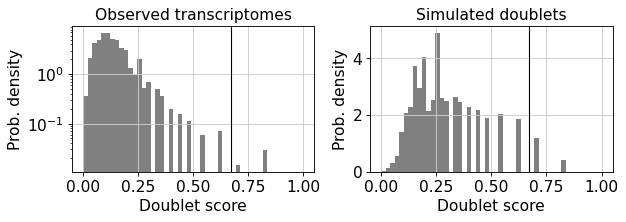

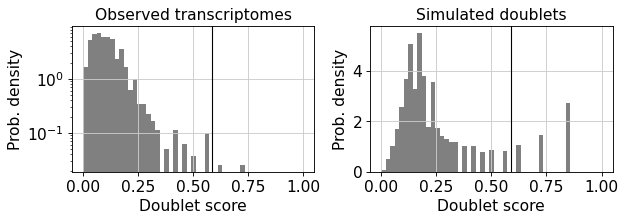

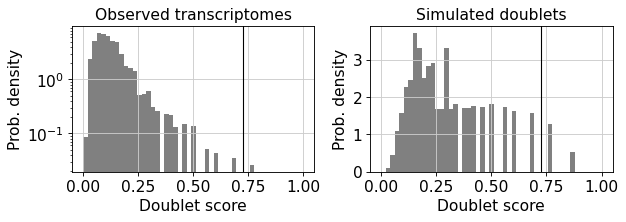

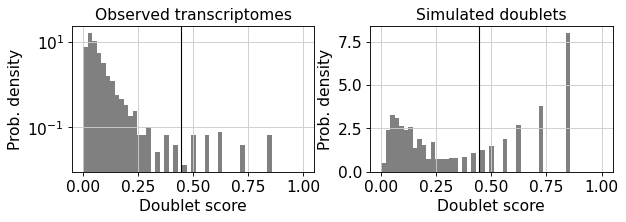

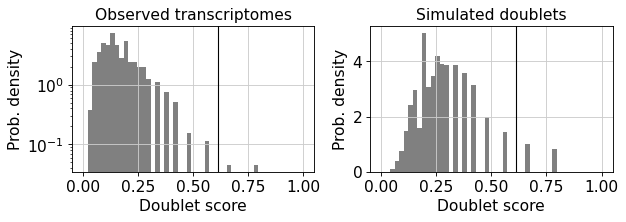

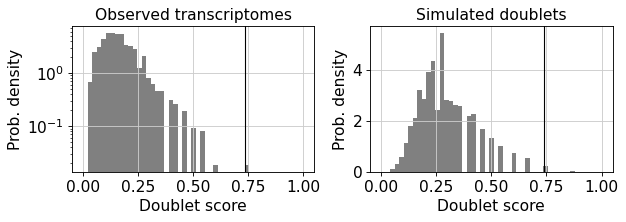

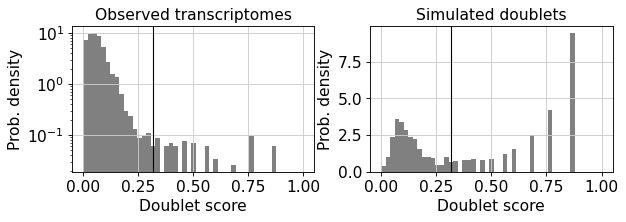

In [21]:
for i in range(len(adata)):
    scrub_obj[i].plot_histogram()

In [22]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

190
['MI: Number of doublets = 3']
73
['MI: Number of doublets = 4']
253
['MI: Number of doublets = 3']
43
['MI: Number of doublets = 25']
9
['Sham: Number of doublets = 4']
156
['Sham: Number of doublets = 2']
101
['Sham: Number of doublets = 88']


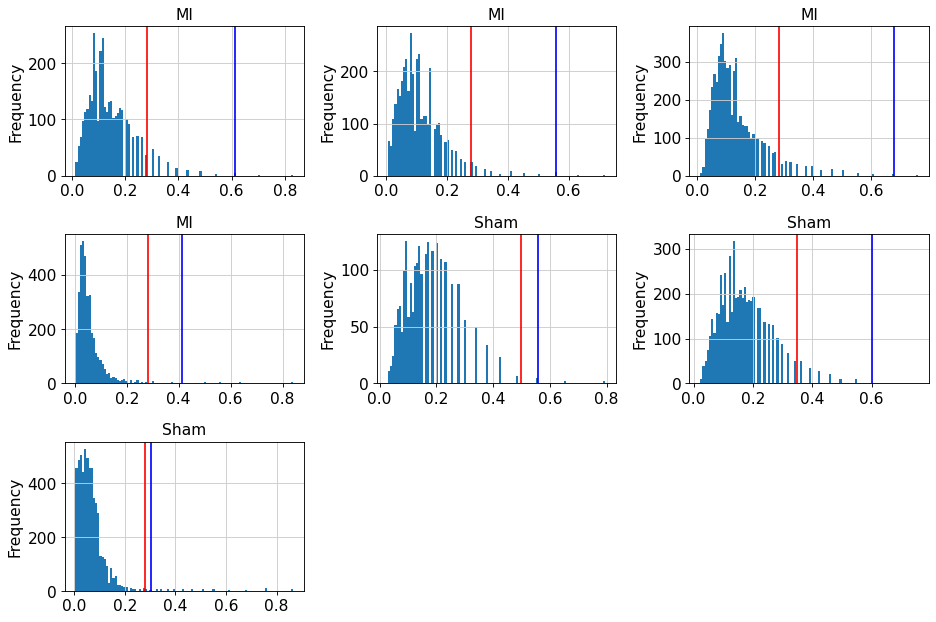

In [23]:
cutoffs = [0.28, 0.28, 0.28, 0.28, 0.5, 0.35, 0.28]

fig, ax = plt.subplots(3,3, figsize=(12,8))
ax = ax.flatten()
ax = trim_axs(ax, len(adata))
for i in range(len(adata)):    
    pd.DataFrame(adata[i].obs['db_scores']).plot.hist(bins=100, ax=ax[i])
    ax[i].axvline(x=cutoffs[i], color='r')
    ax[i].axvline(x=np.sort(adata[i].obs['db_scores'])[::-1][np.sum(adata[i].obs['predicted_db'])], color='b')
    ax[i].get_legend().remove()
    ax[i].set_title(adata[i].obs['Condition'][0])
    print(np.sum(adata[i].obs['db_scores'] > cutoffs[i]))
    print(np.unique(adata[i].obs['Condition'])+': Number of doublets = '+str(np.sum(adata[i].obs['predicted_db'])))
plt.tight_layout()  

In [24]:
for i in range(len(adata)):
    adata[i].obs['predicted_db'] = adata[i].obs['db_scores'] > cutoffs[i]

In [25]:
# remove doublets
for i in range(len(adata)):
    print(np.unique(adata[i].obs['Condition'])+str(adata[i].shape))
    adata[i] = adata[i][~adata[i].obs['predicted_db'],:].copy()
    print(np.unique(adata[i].obs['Condition'])+str(adata[i].shape))

['MI(3403, 27999)']
['MI(3213, 27999)']
['MI(3875, 27999)']
['MI(3802, 27999)']
['MI(5668, 27999)']
['MI(5415, 27999)']
['MI(3733, 27999)']
['MI(3690, 27999)']
['Sham(2184, 27999)']
['Sham(2175, 27999)']
['Sham(5346, 27999)']
['Sham(5190, 27999)']
['Sham(5723, 27999)']
['Sham(5622, 27999)']


# QC

In [30]:
[x for x in adata[0].var_names if 'mt-' in x]

['mt-Nd1',
 'mt-Nd2',
 'mt-Co1',
 'mt-Co2',
 'mt-Atp8',
 'mt-Atp6',
 'mt-Co3',
 'mt-Nd3',
 'mt-Nd4l',
 'mt-Nd4',
 'mt-Nd5',
 'mt-Nd6',
 'mt-Cytb']

In [26]:
for i in range(len(adata)):
    adata[i].var['mt'] = adata[i].var_names.str.startswith('mt-') 
    sc.pp.calculate_qc_metrics(adata[i], qc_vars=['mt'], inplace=True)

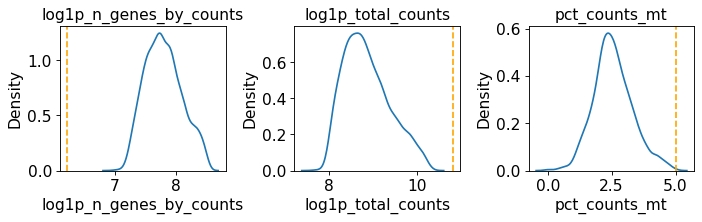

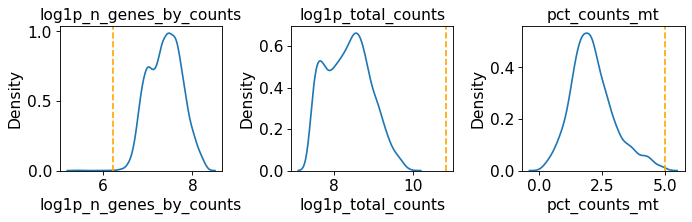

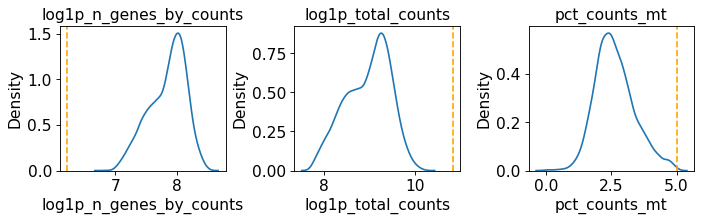

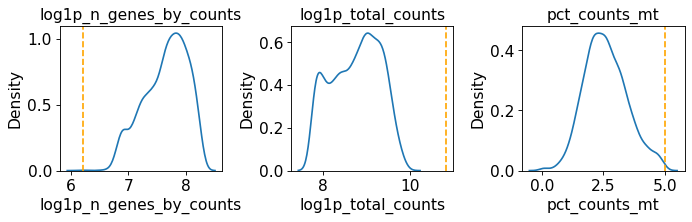

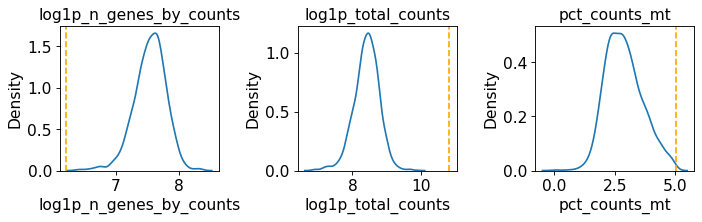

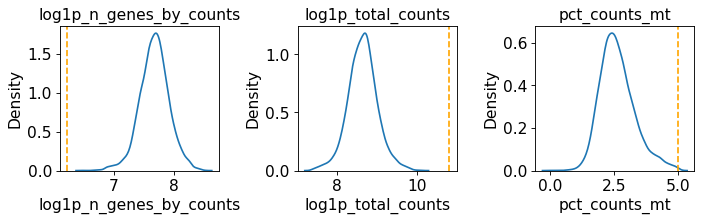

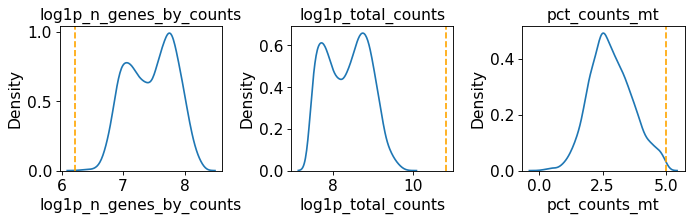

In [27]:
cutoffs = [[500,50000, np.exp(5)],
           [500,50000, np.exp(5)],
           [500,50000, np.exp(5)],
           [500,50000, np.exp(5)],
           [500,50000, np.exp(5)],
           [500,50000, np.exp(5)],
           [500,50000, np.exp(5)]]
for i in range(len(adata)):
    obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt']
    fig,ax = plt.subplots(1,3, figsize=(9,3))
    for j in range(len(obs_terms)):
        sns.kdeplot(adata[i].obs[obs_terms[j]], ax=ax[j])
        ax[j].grid(False)
        ax[j].set_title(obs_terms[j])
        ax[j].axvline(np.log1p(cutoffs[i][j]), c='orange', linestyle='--')
    plt.tight_layout()

In [28]:
for i in range(len(adata)):
    sc.pp.filter_cells(adata[i], min_genes=cutoffs[i][0])
    #sc.pp.filter_genes(adata[i], min_cells=1)
    adata[i] = adata[i][(adata[i].obs['total_counts'] <= cutoffs[i][1]) & (adata[i].obs['pct_counts_mt'] <= np.log(cutoffs[i][2])), :].copy()
    print(adata[i].obs['Condition'].value_counts().sort_index())

filtered out 2 cells that have less than 500 genes expressed


MI    3213
Name: Condition, dtype: int64
MI    3800
Name: Condition, dtype: int64


filtered out 1 cells that have less than 500 genes expressed


MI    5415
Name: Condition, dtype: int64
MI    3689
Name: Condition, dtype: int64
Sham    2175
Name: Condition, dtype: int64
Sham    5190
Name: Condition, dtype: int64
Sham    5622
Name: Condition, dtype: int64


In [29]:
for i in range(len(adata)):
    print(adata[i].shape)

(3213, 27999)
(3800, 27999)
(5415, 27999)
(3689, 27999)
(2175, 27999)
(5190, 27999)
(5622, 27999)


In [30]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata)

In [36]:
adata1.shape

(29104, 27999)

In [37]:
sc.pp.filter_genes(adata1, min_cells=1)

filtered out 7906 genes that are detected in less than 1 cells


In [38]:
adata1.write('./write/EMTAB7376_raw.h5ad')

... storing 'CellType' as categorical
... storing 'Genotype' as categorical
... storing 'Age' as categorical
... storing 'Condition' as categorical
... storing 'Batch' as categorical
... storing 'ERR' as categorical


# Normalisation

In [39]:
adata = sc.read('./write/EMTAB7376_raw.h5ad')

In [40]:
print(adata.shape)

(29104, 20093)


In [41]:
# normalisation
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:04): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [42]:
# log counts
sc.pp.log1p(adata)

In [43]:
adata.raw = adata

In [44]:
print(adata.shape)

(29104, 20093)


In [45]:
adata.write('./write/EMTAB7376_lognorm.h5ad')

# Cell Cycle Assignment

In [56]:
adata = sc.read('./write/EMTAB7376_lognorm.h5ad')

In [46]:
print(adata.shape)

(29104, 20093)


In [47]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [48]:
np.setdiff1d(cell_cycle_genes, adata.raw.var_names)

array(['Mlf1ip'], dtype='<U8')

In [49]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print('Number of s_genes: '+str(len(s_genes)))
print('Number of g2m_genes: '+str(len(g2m_genes)))
print('Total number of cell cycle genes: '+str(len(cell_cycle_genes)))

Number of s_genes: 43
Number of g2m_genes: 54
Total number of cell cycle genes: 97


In [50]:
ERR = adata.obs['ERR'].cat.categories
print(ERR)

Index(['ERR2931597', 'ERR2931598', 'ERR2931599', 'ERR2931603', 'ERR2931607',
       'ERR2931611', 'ERR2931615'],
      dtype='object')


In [51]:
phase = []
for i in range(len(ERR)):
    adata_sub = adata[adata.obs['ERR'] == ERR[i]].copy()
    print(adata_sub.shape)
    sc.pp.scale(adata_sub)
    sc.tl.score_genes_cell_cycle(adata_sub, s_genes=s_genes, g2m_genes=g2m_genes, use_raw=False)
    phase.append(adata_sub.obs[['phase', 'S_score', 'G2M_score']])

(3213, 20093)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    471 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(2175, 20093)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    686 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    685 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(5415, 20093)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(5190, 20093)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    688 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(3800, 20093)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    771 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    644 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(3689, 20093)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(5622, 20093)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    771 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [52]:
phase_pd = pd.concat(phase)

In [53]:
phase_pd.head()

,phase,S_score,G2M_score
AAATGCCCACTTAAGC_MI_day3-0-0,G1,-0.349084,-0.235143
AACTGGTAGAGGTACC_MI_day3-0-0,S,0.405593,0.322944
ACACCCTTCTGTCCGT_MI_day3-0-0,G1,-0.312341,-0.018741
ACACCGGCAAGCGTAG_MI_day3-0-0,G1,-0.089985,-0.133321
ACCAGTAGTCAGAATA_MI_day3-0-0,G1,-0.278265,-0.068258


In [54]:
print(phase_pd.shape)

(29104, 3)


In [55]:
phase_pd.to_csv('cell_cycle_results.txt')

# Select highly variable genes

In [ ]:
adata = sc.read('./write/EMTAB7376_lognorm.h5ad')

In [59]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [60]:
adata.obs.head(3)

,Cluster,CellType,Genotype,batch,StudyID,Age,Development_stage,Stain,Organism,Gender,...,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,n_counts,phase,S_score,G2M_score
AAATGCCCACTTAAGC_MI_day3-0-0,nan,GFP,Pdgfra+/Cd31-,0,EMTAB7376,3,adult,C57BL/6J,Mus musculus,male,...,47.081930,62.850730,124.0,4.828314,2.319491,2214,5346.0,G1,-0.349084,-0.235143
AACTGGTAGAGGTACC_MI_day3-0-0,nan,GFP,Pdgfra+/Cd31-,0,EMTAB7376,3,adult,C57BL/6J,Mus musculus,male,...,45.378053,61.581162,249.0,5.521461,1.454949,3963,17114.0,S,0.405593,0.322944
ACACCCTTCTGTCCGT_MI_day3-0-0,nan,GFP,Pdgfra+/Cd31-,0,EMTAB7376,3,adult,C57BL/6J,Mus musculus,male,...,47.664759,64.316042,105.0,4.663439,1.938342,2160,5417.0,G1,-0.312341,-0.018741


In [61]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:15)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


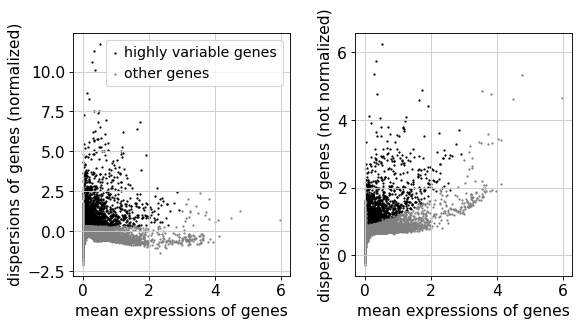

In [62]:
sc.pl.highly_variable_genes(adata)

In [64]:
print(np.sum(adata.var.highly_variable))

2128


In [63]:
adata = adata[:, adata.var.highly_variable].copy()

In [65]:
adata.write('./write/EMTAB7376_lognorm_hvg.h5ad')

# Preliminary processing

In [68]:
adata = sc.read('./write/EMTAB7376_lognorm_hvg.h5ad')

In [69]:
# normally regress out the top layers of unwanted effects
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
    finished (0:00:56)


In [70]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


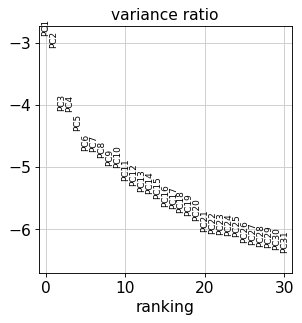

In [71]:
sc.pl.pca_variance_ratio(adata, log=True)

In [72]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)


In [73]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:24)


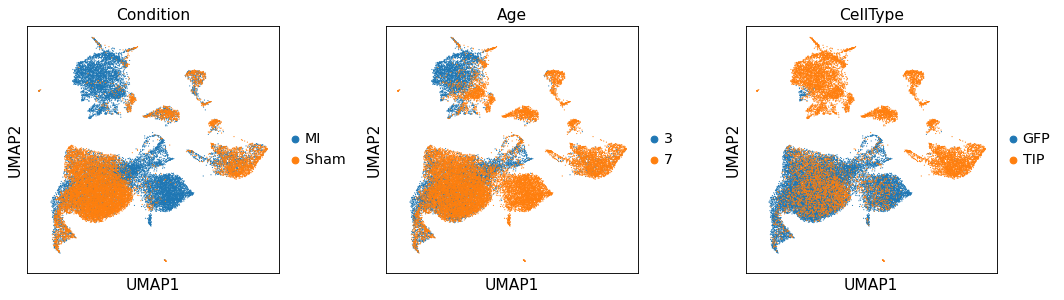

In [79]:
sc.pl.umap(adata, color= ['Condition', 'Day', 'CellType'], wspace=0.3)

In [85]:
adata.write('./write/EMTAB7376_processed.h5ad')

#  Further modify

In [19]:
adata = sc.read('./write/EMTAB7376_processed.h5ad')

In [20]:
adata.obs['Day'].value_counts()

7    19916
3     9188
Name: Day, dtype: int64

In [21]:
adata.obs['Day'] = adata.obs['Day'].astype(int)

In [22]:
adata.obs['Age'].value_counts()

8    29104
Name: Age, dtype: int64

In [23]:
adata.obs['Age'] = adata.obs['Age'].astype(int)

In [24]:
adata.obs['Development_stage'].value_counts()

adult    29104
Name: Development_stage, dtype: int64

In [25]:
adata.obs['Genotype'].value_counts()

Pdgfra+/Cd31-    15993
TIP              13111
Name: Genotype, dtype: int64

In [26]:
adata.obs['Genotype'] = ['WT' if 'TIP' in x else 'Pdgfratm11(EGFP)+CD31-' for x in adata.obs['Genotype']]

In [27]:
adata.obs['Genotype'].value_counts()

Pdgfratm11(EGFP)+CD31-    15993
WT                        13111
Name: Genotype, dtype: int64

In [28]:
adata.obs['CellType'].value_counts()

GFP    15993
TIP    13111
Name: CellType, dtype: int64

In [35]:
adata.obs['CellType'] = 'TIP'

In [36]:
adata.obs['CellType'].value_counts()

TIP    29104
Name: CellType, dtype: int64

In [29]:
adata.obs['StudyID'].value_counts()

EMTAB7376    29104
Name: StudyID, dtype: int64

In [30]:
adata.obs['ERR'].value_counts()

ERR2931615    5622
ERR2931599    5415
ERR2931603    5190
ERR2931607    3800
ERR2931611    3689
ERR2931597    3213
ERR2931598    2175
Name: ERR, dtype: int64

In [37]:
adata.obs['Index'] = adata.obs['ERR']

In [38]:
adata.obs['Index'].value_counts()

ERR2931615    5622
ERR2931599    5415
ERR2931603    5190
ERR2931607    3800
ERR2931611    3689
ERR2931597    3213
ERR2931598    2175
Name: Index, dtype: int64

In [33]:
adata.obs['Tissue'].value_counts()

Cardiac ventricle    29104
Name: Tissue, dtype: int64

In [39]:
adata.obs['Tissue'] = 'ventricle'

In [40]:
adata.obs['Tissue'].value_counts()

ventricle    29104
Name: Tissue, dtype: int64

In [34]:
adata.obs['Condition'].value_counts()

MI      16117
Sham    12987
Name: Condition, dtype: int64

In [41]:
adata.write('./write/EMTAB7376_processed.h5ad')

... storing 'CellType' as categorical
... storing 'Genotype' as categorical
... storing 'Tissue' as categorical
